In [1]:
#!pip install pycaret[analysis]

In [2]:
from pycaret import regression

In [3]:
from pycaret.datasets import get_data
dataset = get_data("diamond")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
dataset = get_data("diamond", profile=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data = dataset.sample(frac=0.9, random_state=786)

In [6]:
data_unseen = dataset.drop(data.index)

In [7]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [8]:
print("Data for Modeling " + str(data.shape))

Data for Modeling (5400, 8)


In [9]:
print("Unseen Data for Prediction " + str(data_unseen.shape))

Unseen Data for Prediction (600, 8)


### Preprocessing

In [10]:
experiment = regression.setup(data = data,
                 target = "Price",
                 session_id = 123,
                 normalize = True,
                 transformation = True,
                 transform_target = True,                 
                 remove_multicollinearity = True,
                 multicollinearity_threshold = 0.95,
                 bin_numeric_features = ["Carat Weight"],
                 log_experiment = False,
                 experiment_name = "diamond1")
                 

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 28)"
5,Transformed train set shape,"(3779, 28)"
6,Transformed test set shape,"(1621, 28)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [11]:
best_model = regression.compare_models(exclude = ["lightgbm"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1707.9544,5903344.1271,2417.2365,0.9413,0.2225,0.1887,0.0710
rf,Random Forest Regressor,1741.3787,7137302.0316,2652.7687,0.9301,0.2402,0.1914,0.1140
et,Extra Trees Regressor,1899.5518,8861962.0801,2964.1057,0.9123,0.2605,0.2042,0.1240
dt,Decision Tree Regressor,1917.2621,9348381.9398,3041.8356,0.9078,0.2611,0.2045,0.0440
huber,Huber Regressor,2459.0362,13448255.4580,3652.8315,0.8665,0.2773,0.2450,0.0490
ridge,Ridge Regression,2525.0260,13756677.3170,3694.6290,0.8634,0.2745,0.2399,0.0430
lr,Linear Regression,2525.0683,13779965.9350,3697.4189,0.8631,0.2748,0.2400,0.2210
br,Bayesian Ridge,2528.8946,13826571.0344,3703.9074,0.8627,0.2745,0.2399,0.0440
ada,AdaBoost Regressor,2708.1303,25054664.8993,4936.7017,0.7588,0.2920,0.2256,0.0700
omp,Orthogonal Matching Pursuit,3038.6247,31316066.5606,5534.5784,0.6968,0.3329,0.2650,0.0440


In [12]:
tuned_best = regression.tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1679.0225,5267570.3128,2295.1188,0.9422,0.2189,0.1822
1,1966.8693,12919474.9145,3594.3671,0.9010,0.2313,0.1945
2,1836.1748,7936481.8015,2817.1762,0.9272,0.2408,0.2054
3,1679.5022,5620524.0428,2370.7644,0.9380,0.2139,0.1786
4,1723.3571,5921593.8542,2433.4325,0.9261,0.2317,0.1982
5,1904.1648,13019205.0876,3608.2136,0.8889,0.2263,0.1933
6,1849.4508,8032177.3277,2834.1096,0.9245,0.2285,0.1930
7,1364.8422,4934572.8565,2221.3898,0.9376,0.1954,0.1531
8,1799.9373,7083354.7602,2661.4573,0.9304,0.2253,0.1871


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
model = regression.create_model("dt")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1924.4656,8736131.7449,2955.6948,0.9041,0.2668,0.2041
1,1980.1004,12538181.9475,3540.9295,0.9039,0.2646,0.2041
2,1912.0015,8982930.8341,2997.1538,0.9176,0.2651,0.2165
3,1923.1600,8364765.4873,2892.1904,0.9077,0.2507,0.1954
4,1945.9234,8658428.0843,2942.5207,0.8920,0.2634,0.2157
5,2020.7376,11914427.8011,3451.7282,0.8983,0.2598,0.2096
6,1939.6026,8723092.9019,2953.4883,0.9180,0.2619,0.1962
7,1485.4546,5583419.3599,2362.9260,0.9294,0.2226,0.1659
8,1997.2631,9908416.9058,3147.7638,0.9027,0.2708,0.2056


In [14]:
import numpy as np

params = {
    # "n_neighbors": np.arange(2, 11, 2),
    # "leaf_size": np.arange(10,40, 5)
}

tuned_model = regression.tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2929.8586,26840608.1029,5180.7922,0.7053,0.2901,0.2413
1,3138.3015,51647359.2091,7186.6097,0.6042,0.3049,0.2336
2,3083.0764,35906522.3643,5992.2051,0.6707,0.3053,0.2545
3,2822.5247,23523918.8485,4850.1463,0.7405,0.2880,0.2289
4,2668.1829,22006855.6840,4691.1465,0.7255,0.2889,0.2409
5,2858.9299,38058652.9874,6169.1696,0.6752,0.2907,0.2383
6,3081.1326,31938357.6425,5651.4032,0.6999,0.3088,0.2508
7,2563.3202,18627752.1400,4315.9880,0.7644,0.2669,0.2239
8,2704.9769,24321938.0367,4931.7277,0.7611,0.2812,0.2239


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate model

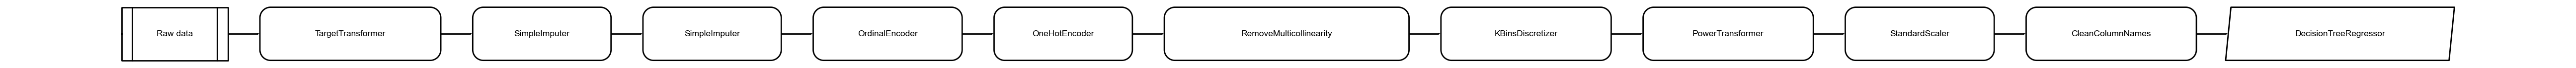

In [15]:
regression.plot_model(tuned_model, plot = "pipeline")

In [16]:
regression.plot_model(tuned_model, plot = "residuals_interactive")

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

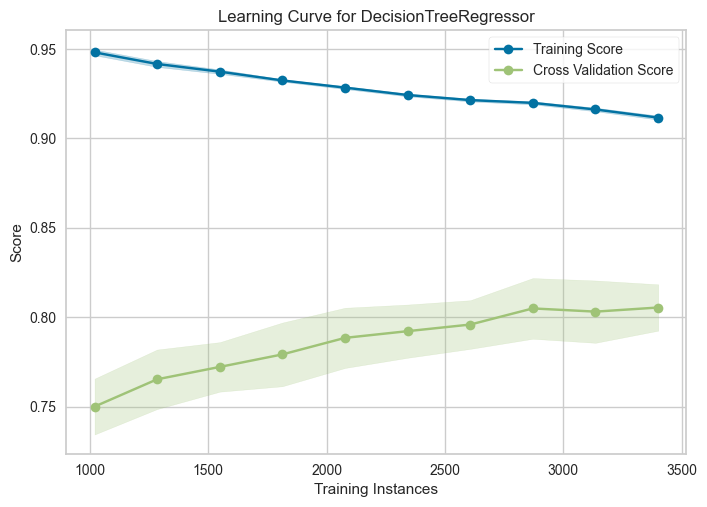

In [17]:
regression.plot_model(tuned_model, plot = "learning")


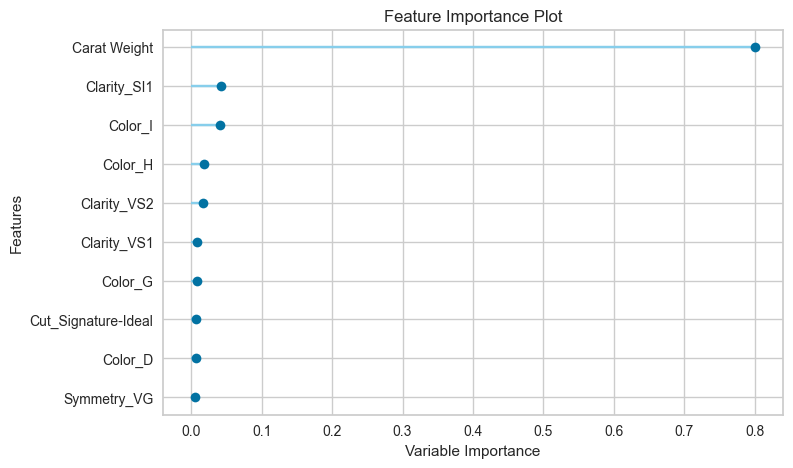

In [18]:
regression.plot_model(tuned_model, plot = "feature")

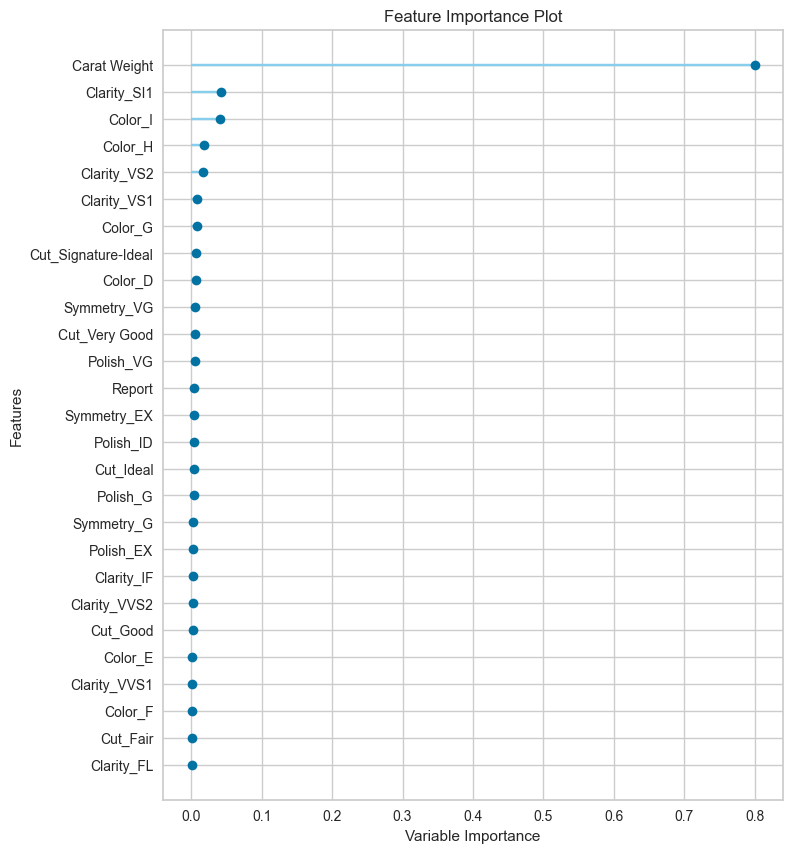

In [19]:
regression.plot_model(tuned_model, plot = "feature_all")

In [20]:
regression.plot_model(tuned_model, plot = "parameter")

,Parameters
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0
random_state,123


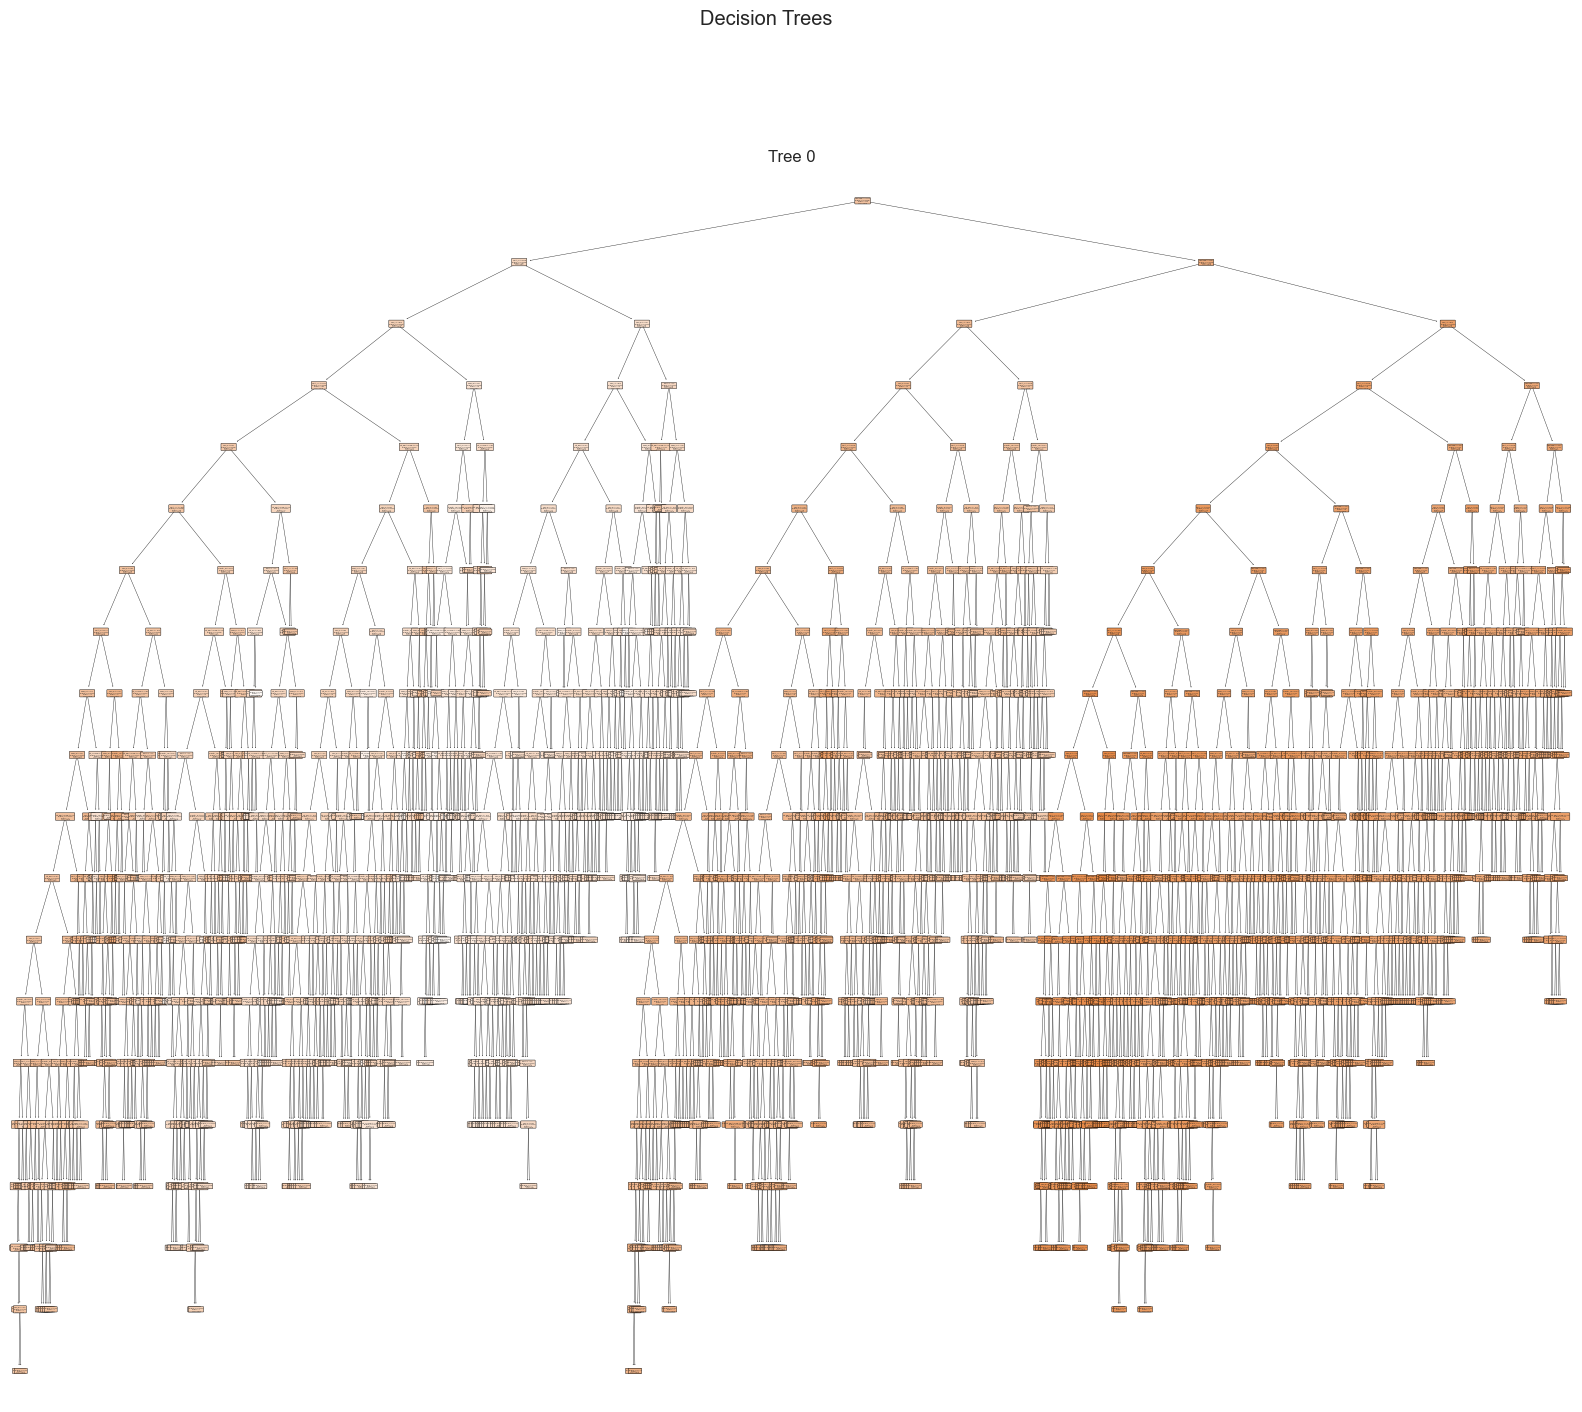

In [21]:
regression.plot_model(tuned_model, plot = "tree")

In [22]:
regression.predict_model(tuned_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1760.3773,6164870.2398,2482.9157,0.9438,0.2237,0.1886


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
3172,1.16,Ideal,E,SI1,EX,EX,GIA,7059,4747.681637
658,1.14,Ideal,G,SI1,EX,VG,GIA,5809,4711.378532
3180,1.25,Very Good,G,IF,VG,VG,GIA,10641,12125.163574
1340,0.79,Ideal,G,SI1,VG,EX,GIA,2871,4609.899622
586,2.23,Very Good,H,VS2,VG,VG,GIA,21706,21464.281806
...,...,...,...,...,...,...,...,...,...
790,1.22,Ideal,F,VVS1,EX,EX,GIA,12906,14873.556411
4934,0.83,Ideal,E,SI1,G,EX,GIA,3235,4502.819876
469,1.51,Very Good,I,VS2,VG,VG,GIA,9058,7620.290048
2061,1.16,Ideal,I,SI1,EX,VG,GIA,5091,4050.735934


### Finish and Deploy

In [23]:
final_best = regression.finalize_model(tuned_best)

In [27]:
model_output = "./models/diamond-pipeline"
regression.save_model(final_best, model_output)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrappe

### Production

In [28]:
model = regression.load_model(model_output)

Transformation Pipeline and Model Successfully Loaded


In [29]:
predictions = regression.predict_model(model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1789.0088,6578248.0595,2564.8096,0.9361,0.2227,0.1853


In [30]:
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,10166.494098
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,9562.490920
2,1.01,Good,E,SI1,G,G,GIA,5161,4360.275460
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,30857.551363
4,1.01,Good,I,SI1,VG,VG,GIA,4238,3756.506116


### Metrics


In [32]:
from pycaret.utils.generic import check_metric

In [38]:
check_metric(predictions.Price, predictions.prediction_label, "R2")

0.9361